<a href="https://colab.research.google.com/github/dhamvi01/Cross-Validation/blob/master/Cross_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import Libraries

In [0]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## 2. Import data and train test split

In [0]:
diabetes = datasets.load_diabetes() # load diabeted dataset 
x = diabetes.data
y = diabetes.target

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

print(x_train.shape)
print(x_test.shape)

(353, 10)
(89, 10)


## 3. Model Building

In [0]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)

## 4. Model validation

Text(0, 0.5, 'Pred Value')

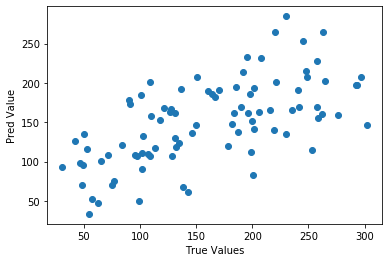

In [22]:
plt.scatter(y_test,pred)
plt.xlabel('True Values')
plt.ylabel('Pred Value')

In [23]:
print("Score", model.score(x_test, y_test))

Score 0.3664213123954898


## 5. KFold Example

In [24]:
from sklearn.model_selection import KFold
import numpy as np
p = np.array([[1,2], [3,4], [1,2], [3,4]])
q = np.array([1,2,3,4])
kf = KFold(n_splits=2)
kf.get_n_splits(p)
print(kf)

KFold(n_splits=2, random_state=None, shuffle=False)


In [25]:
for i,j in kf.split(p):
  print('Train:' ,i,"Test:",j)

Train: [2 3] Test: [0 1]
Train: [0 1] Test: [2 3]


As you can see, KFold is splitting the data into different subset, It's very simple

## 6. KFold with Our Model

In [0]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [29]:
score = cross_val_score(model,x,y,cv=6)
print('Cross val score', score)

Cross val score [0.4554861  0.46138572 0.40094084 0.55220736 0.43942775 0.56923406]


## 7. Cross val performance check

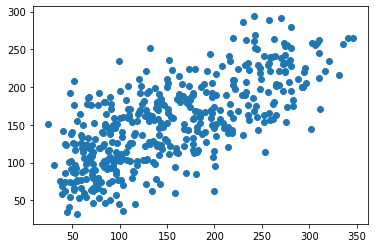

In [30]:
pred = cross_val_predict(model,x,y,cv=6)
plt.scatter(y,pred)

In [31]:
accuracy = metrics.r2_score(y,pred)
print("Cross Val accuracy:",accuracy)

Cross Val accuracy: 0.4908065838640776


As shown, Cross validation provides true model accuracy using different data splits, When you have small data sample size rather than splitting train,valid and test split use KFold cross validation.

Cross validation potentially uses to avoid model overfitting, At the end you get true model accuracy